In [42]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_extraction.text import TfidfVectorizer
import pymorphy2
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chugu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [135]:
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<AxesSubplot:>

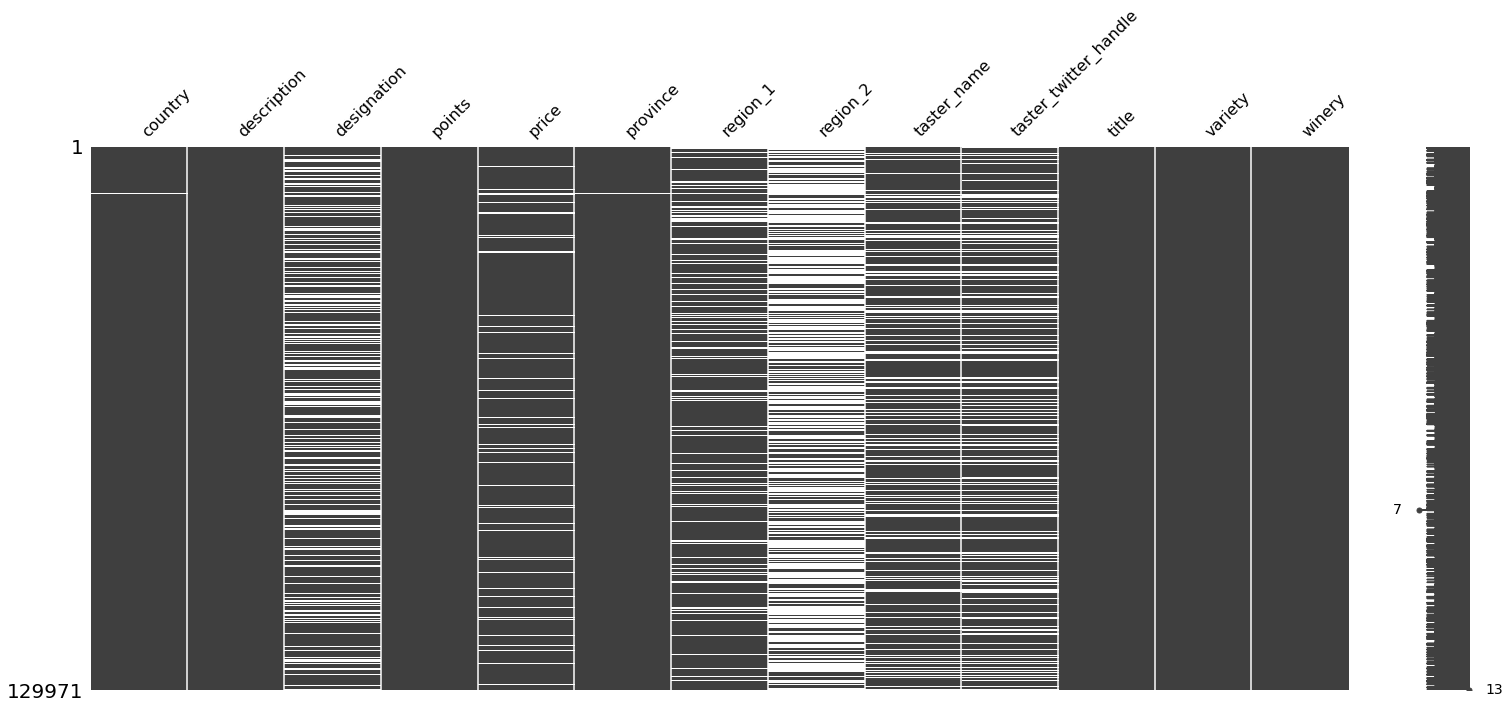

In [136]:
msno.matrix(df)

<AxesSubplot:>

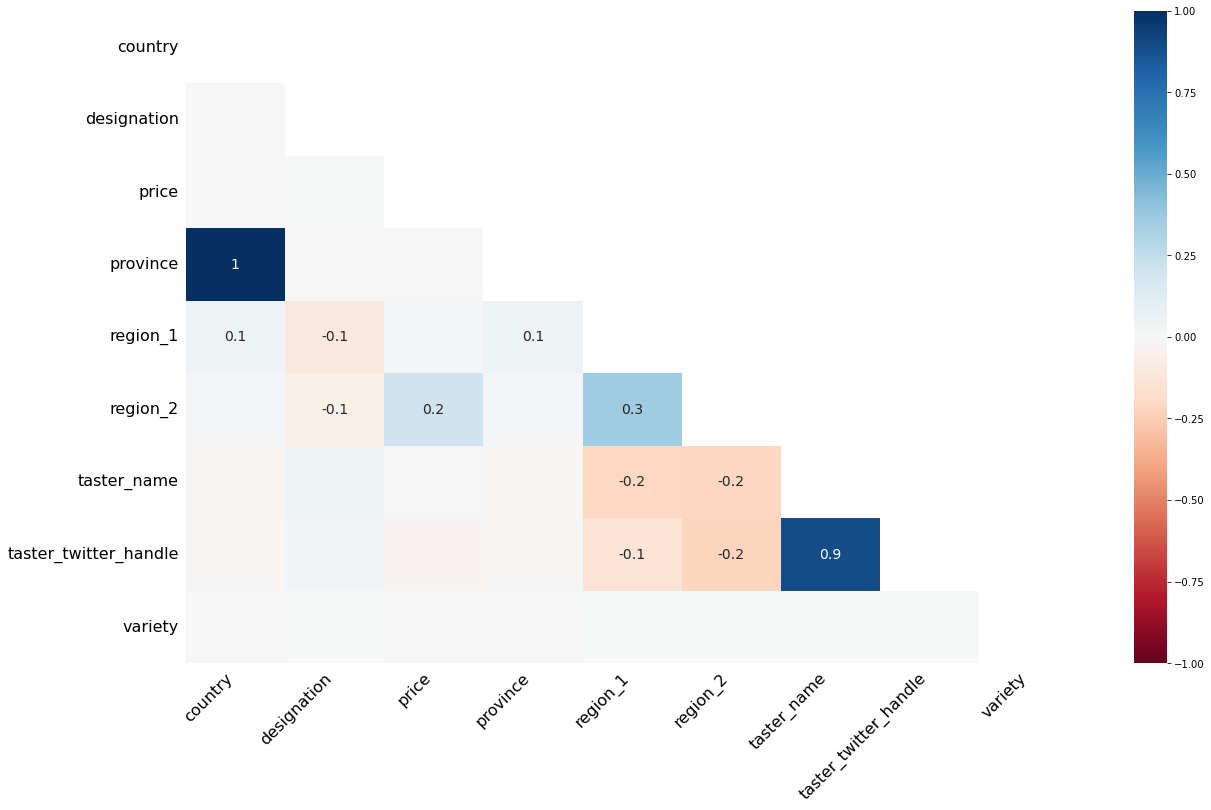

In [137]:
msno.heatmap(df)

<AxesSubplot:>

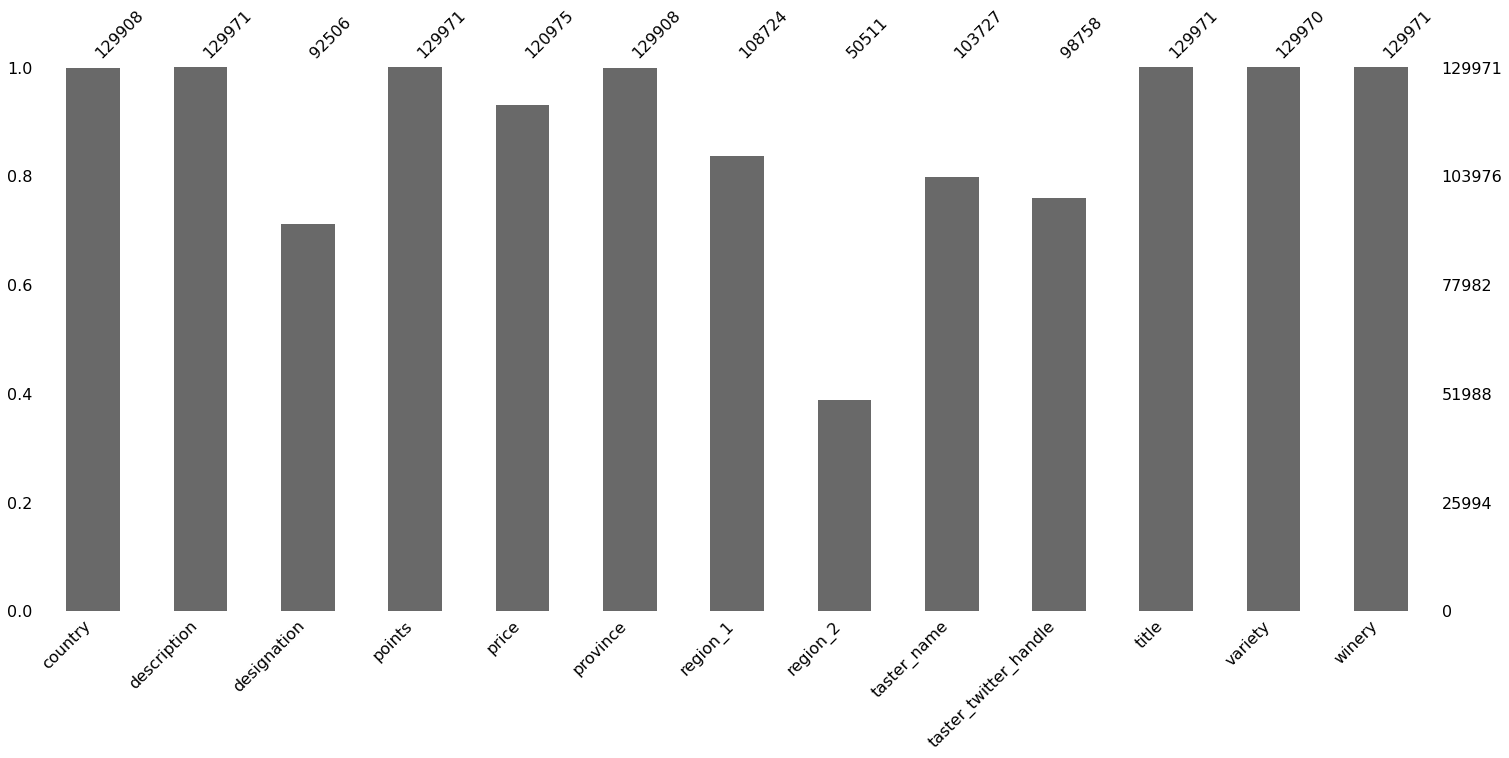

In [138]:
msno.bar(df)

In [139]:
df["country"].isna().sum()

63

In [140]:
df = df.dropna(subset=["country"])
df["country"].isna().sum()

0

In [141]:
for column in df.columns:
    print(f"Column `{column}`; N/A Count: {df[column].isna().sum()}")

Column `country`; N/A Count: 0
Column `description`; N/A Count: 0
Column `designation`; N/A Count: 37454
Column `points`; N/A Count: 0
Column `price`; N/A Count: 8992
Column `province`; N/A Count: 0
Column `region_1`; N/A Count: 21184
Column `region_2`; N/A Count: 79397
Column `taster_name`; N/A Count: 26244
Column `taster_twitter_handle`; N/A Count: 31213
Column `title`; N/A Count: 0
Column `variety`; N/A Count: 1
Column `winery`; N/A Count: 0


In [142]:
df = df.dropna(thresh=len(df)*.7, axis=1)
for column in df.columns:
    print(f"Column `{column}`; N/A Count: {df[column].isna().sum()}")

Column `country`; N/A Count: 0
Column `description`; N/A Count: 0
Column `designation`; N/A Count: 37454
Column `points`; N/A Count: 0
Column `price`; N/A Count: 8992
Column `province`; N/A Count: 0
Column `region_1`; N/A Count: 21184
Column `taster_name`; N/A Count: 26244
Column `taster_twitter_handle`; N/A Count: 31213
Column `title`; N/A Count: 0
Column `variety`; N/A Count: 1
Column `winery`; N/A Count: 0


In [143]:
df = df.dropna(subset=["variety"])
df["country"].isna().sum()

0

In [144]:
len(set(df["taster_twitter_handle"]))

16

In [145]:
label_arr = ["designation", "region_1", "taster_name", "taster_twitter_handle"]
for column in label_arr:
    df[column].fillna("NO DATA", inplace = True)

In [146]:
for column in df.columns:
    print(f"Column `{column}`; N/A Count: {df[column].isna().sum()}")

Column `country`; N/A Count: 0
Column `description`; N/A Count: 0
Column `designation`; N/A Count: 0
Column `points`; N/A Count: 0
Column `price`; N/A Count: 8992
Column `province`; N/A Count: 0
Column `region_1`; N/A Count: 0
Column `taster_name`; N/A Count: 0
Column `taster_twitter_handle`; N/A Count: 0
Column `title`; N/A Count: 0
Column `variety`; N/A Count: 0
Column `winery`; N/A Count: 0


In [147]:
df["price"].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [148]:
imputer = IterativeImputer(ExtraTreesRegressor(random_state=42), random_state=42)
price = imputer.fit_transform(df["price"].to_numpy().reshape(-1, 1))

In [149]:
df["price"] = price

In [150]:
labeled_columns = ["country", "designation", "province", "region_1", "taster_name", "taster_twitter_handle", "title", "variety", "winery"]
label_encoders = []

for column in labeled_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    label_encoders.append(encoder)

In [151]:
df

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,22,"Aromas include tropical fruit, broom, brimston...",36782,87,35.368796,331,424,9,4,79489,684,11602
1,31,"This is ripe and fruity, a wine that is smooth...",2322,87,15.000000,108,738,16,10,89326,447,12949
2,40,"Tart and snappy, the flavors of lime flesh and...",23161,87,14.000000,268,1218,15,7,89740,433,13011
3,40,"Pineapple rind, lemon pith and orange blossom ...",27955,87,13.000000,218,549,0,15,100827,476,14380
4,40,"Much like the regular bottling from 2012, this...",36442,87,65.000000,268,1218,15,7,102755,437,14610
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,17,Notes of honeysuckle and cantaloupe sweeten th...,4231,90,28.000000,232,738,1,15,40608,476,6641
129967,40,Citation is given as much as a decade of bottl...,23161,90,75.000000,268,788,15,7,28942,437,4774
129968,15,Well-drained gravel soil gives this wine its c...,17453,90,30.000000,11,21,16,10,36526,209,5927
129969,15,"A dry style of Pinot Gris, this is crisp with ...",23161,90,32.000000,11,21,16,10,37075,433,6025


In [152]:
morph = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words("english")

def text_preprocess(text):
    tokens = text.lower().split()
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    text = " ".join(tokens)
    return text

In [158]:
%%time
for i in range(len(df)):
    text = df.iat[i, 1]
    text = text_preprocess(text)
    df.iat[i, 1] = text

Wall time: 8min 13s


In [159]:
df

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,22,"aromas include tropical fruit, broom, brimston...",36782,87,35.368796,331,424,9,4,79489,684,11602
1,31,"ripe fruity, wine smooth still structured. fir...",2322,87,15.000000,108,738,16,10,89326,447,12949
2,40,"tart snappy, flavors lime flesh rind dominate....",23161,87,14.000000,268,1218,15,7,89740,433,13011
3,40,"pineapple rind, lemon pith orange blossom star...",27955,87,13.000000,218,549,0,15,100827,476,14380
4,40,"much like regular bottling 2012, comes across ...",36442,87,65.000000,268,1218,15,7,102755,437,14610
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,17,notes honeysuckle cantaloupe sweeten delicious...,4231,90,28.000000,232,738,1,15,40608,476,6641
129967,40,citation given much decade bottle age prior re...,23161,90,75.000000,268,788,15,7,28942,437,4774
129968,15,well-drained gravel soil gives wine crisp dry ...,17453,90,30.000000,11,21,16,10,36526,209,5927
129969,15,"dry style pinot gris, crisp acidity. also weig...",23161,90,32.000000,11,21,16,10,37075,433,6025


In [161]:
df.to_csv("ready_data.csv", index=False)